# Title : Comparative Analysis of Decision Trees, Random Forest, XGBoost, Logistic Regression  and K-Nearest Neighbours for Phishing Website Detection

# Mount to the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imporintg Libraries , Loading the dataset and Basic few operations

In [2]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Phishing_Legitimate_full.csv')


# Basic few  Operations for checking the dataset loaded

# Display first 5 rows
print("First 5 Rows of the Dataset:")
print(df.head())

# Shape of the dataset
print("\nShape of the Dataset:", df.shape)

# Info about the dataset
print("\nDataset Information:")
print(df.info())


# Summary statistics
print("\nDescriptive Statistics:")
print(df.describe())


First 5 Rows of the Dataset:
   id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1        3               1          5         72        0   
1   2        3               1          3        144        0   
2   3        3               1          2         58        0   
3   4        3               1          6         79        1   
4   5        3               0          4         46        0   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                  0         0            0              0  ...   
1                  0         0            0              2  ...   
2                  0         0            0              0  ...   
3                  0         0            0              0  ...   
4                  0         0            0              0  ...   

   IframeOrFrame  MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  \
0              0             0                 1                 1   
1              0             0       

# Strucure and Overview of the Dataset

In [3]:

# Number of observations (rows)
num_observations = df.shape[0]

# Number of features (columns)
num_features = df.shape[1]

print(f"Number of Observations: {num_observations}")
print(f"Number of Features: {num_features}")

# Display all feature names
print("\nFeature Names:")
print(df.columns.tolist())


# Identify Dependent and Independent Variables


# Set the target column based on dataset info
target_column = 'CLASS_LABEL'

# Dependent variable (target)
y = df[target_column]

# Independent variables (features)
X = df.drop(columns=[target_column, 'id'])

print(f"\nDependent Variable (Target): {target_column}")
print(f"Number of Independent Variables: {X.shape[1]}")

# Display first few rows of X and y
print("\nIndependent Variables (X) - Sample:")
print(X.head())

print("\nDependent Variable (y) - Sample:")
print(y.head())


Number of Observations: 10000
Number of Features: 50

Feature Names:
['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT', 'CLASS_LABEL']

Dependent 

# Advanced Exploratory Data Analysis (EDA) => Visualisations

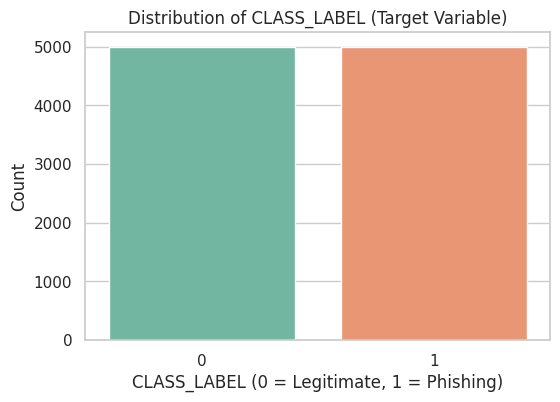

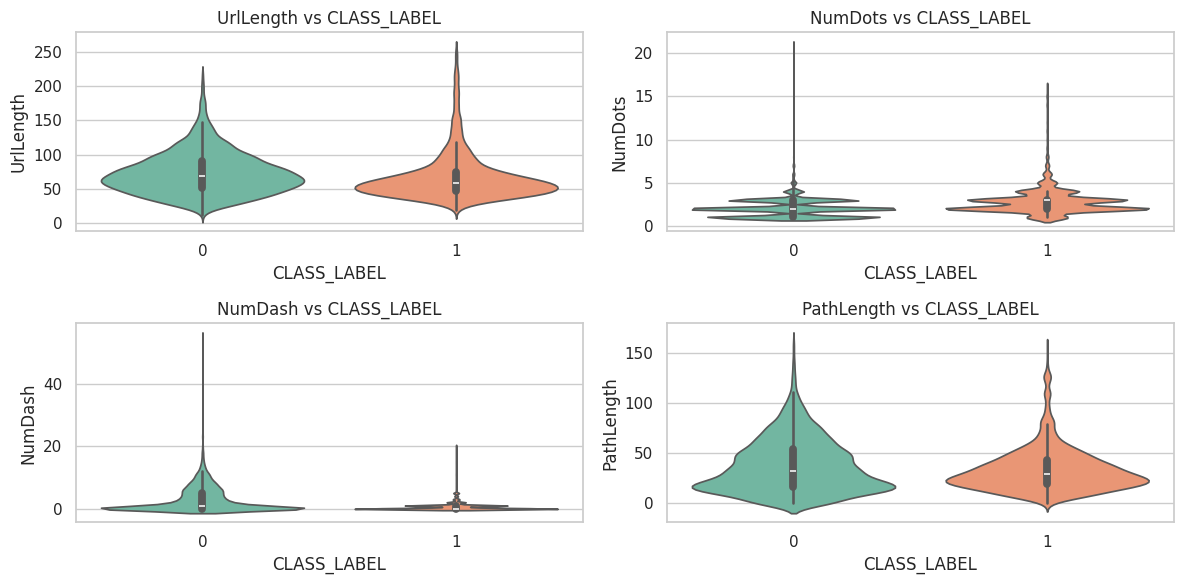

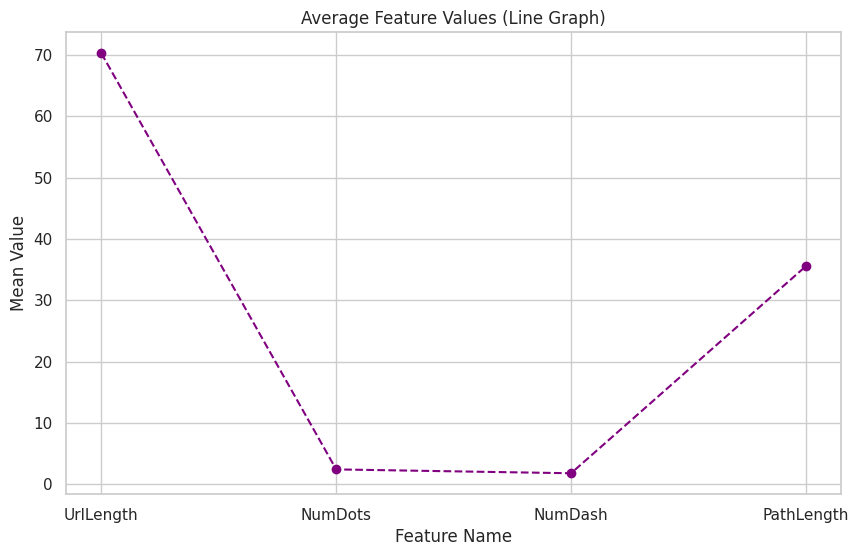

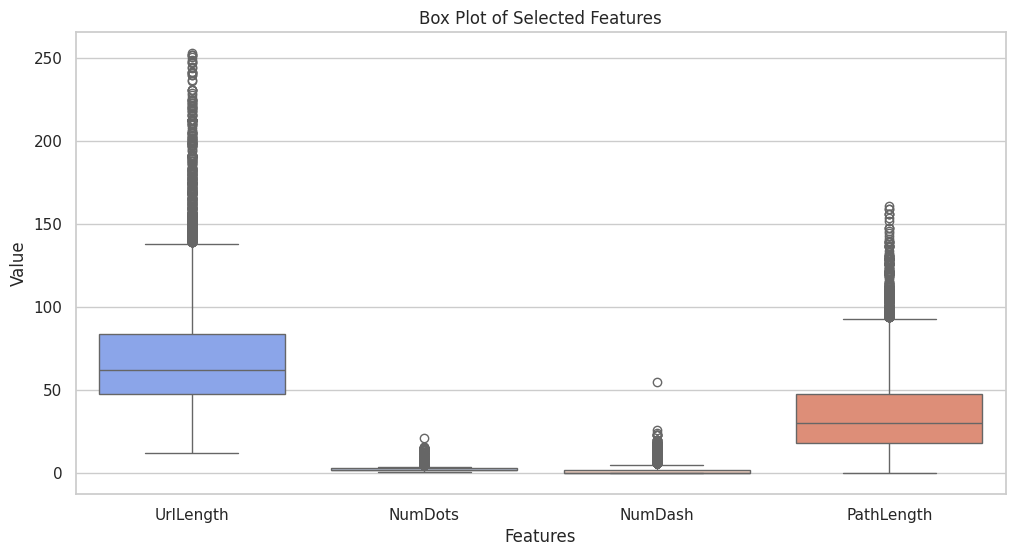

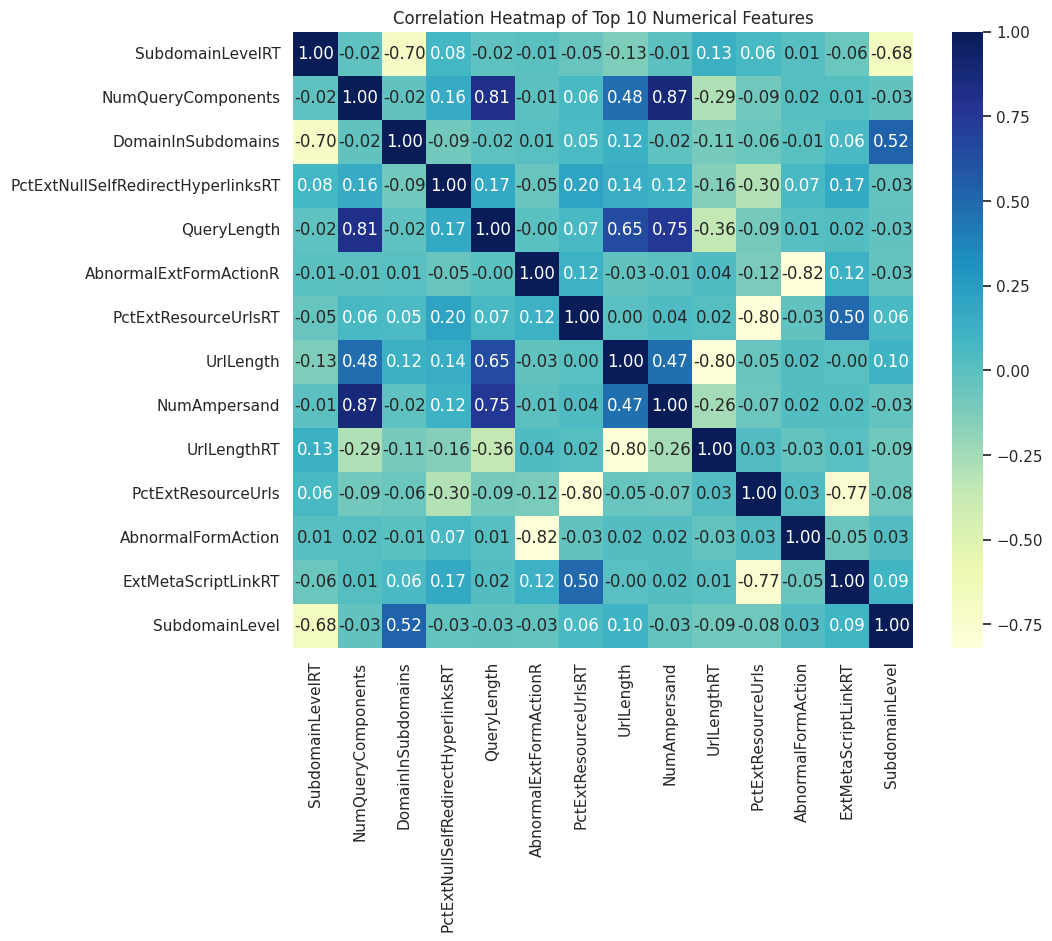

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all plots
sns.set(style="whitegrid", palette="pastel")


# BAR CHART — Target Variable Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="Set2")
plt.title("Distribution of CLASS_LABEL (Target Variable)")
plt.xlabel("CLASS_LABEL (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Count")
plt.show()


# VIOLIN PLOT — Feature Distribution Across Classes

selected_features = ['UrlLength', 'NumDots', 'NumDash', 'PathLength']
plt.figure(figsize=(12,6))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x=y, y=X[feature], palette="Set2")
    plt.title(f"{feature} vs CLASS_LABEL")
plt.tight_layout()
plt.show()


# LINE GRAPH — Mean Value Trend of Selected Features

plt.figure(figsize=(10,6))
plt.plot(X[selected_features].mean(), marker='o', linestyle='--', color='purple')
plt.title("Average Feature Values (Line Graph)")
plt.xlabel("Feature Name")
plt.ylabel("Mean Value")
plt.grid(True)
plt.show()


# BOX PLOT — Outlier Detection for Selected Features

plt.figure(figsize=(12,6))
sns.boxplot(data=X[selected_features], palette="coolwarm")
plt.title("Box Plot of Selected Features")
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()

# CORRELATION HEATMAP — Top 10 Most Correlated Features
plt.figure(figsize=(10,8))
corr_matrix = X.corr().abs()
top10_features = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates().index[:10]
top_corr_features = set([i for pair in top10_features for i in pair])
sns.heatmap(X[list(top_corr_features)].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Top 10 Numerical Features")
plt.show()


# Data Pre Processing and Feature Scaling

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd


# Checking for Missing Values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values[missing_values > 0])

# Handlng missing values
if missing_values.sum() > 0:
    print("\nHandling Missing Values...")
    # Filling numeric columns with mean and categorical with mode (Using Imputation Method)
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
else:
    print("No Missing Values Found.")

# Removing Duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
removed_rows = initial_rows - df.shape[0]
print(f"\nRemoved {removed_rows} duplicate rows.")

# Handling Categorical Variables (if any)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    print(f"\nEncoding Categorical Columns: {list(categorical_cols)}")
    le = LabelEncoder()
    for col in categorical_cols:
        X[col] = le.fit_transform(X[col])
else:
    print("\nNo Categorical Columns Found.")


# Feature Scaling
print("\nApplying Standard Scaling...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("Feature Scaling Completed.")


Missing Values in Each Column:
 Series([], dtype: int64)
No Missing Values Found.

Removed 0 duplicate rows.

No Categorical Columns Found.

Applying Standard Scaling...
Feature Scaling Completed.


# Splitting the Dataset into 80:20 ratio

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\nDataset Split Completed Successfully.")
print(f"Training Set: {X_train.shape}")
print(f"Testing Set:  {X_test.shape}")


Dataset Split Completed Successfully.
Training Set: (8000, 48)
Testing Set:  (2000, 48)


# Model Defintions and Evaluation

# Common Function for Importing Evaluation Metrics

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Model 1 : Logistic Regression

# Training the Model

In [8]:
from sklearn.linear_model import LogisticRegression

# Initializing the model
lr_model = LogisticRegression(max_iter=1000)

# Training the model
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)


# Evaluating the Model

LOGISTIC REGRESSION RESULTS
Accuracy: 0.952

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1000
           1       0.94      0.96      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



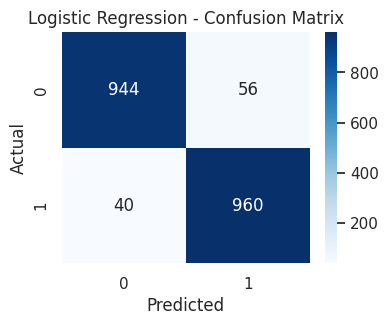

In [9]:
print("LOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Model 2 : Decision Tree

# Training the Model

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    random_state=42
)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)


# Evaluating the Model

DECISION TREE RESULTS
Accuracy: 0.9655

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1000
           1       0.96      0.97      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



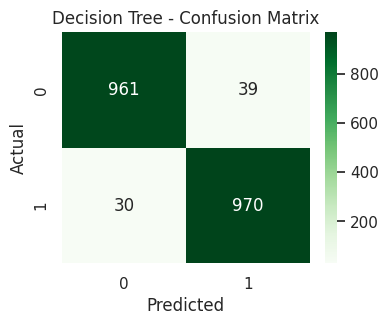

In [11]:
print("DECISION TREE RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Model 3 : Random Forest

# Training the Model

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


# Evaluating the Model

RANDOM FOREST RESULTS
Accuracy: 0.985

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1000
           1       0.99      0.98      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.98      0.98      2000



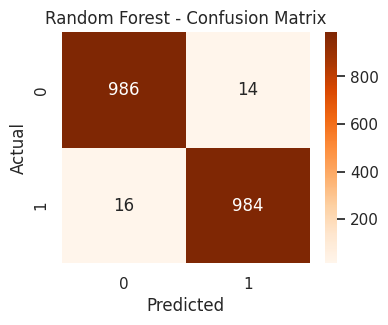

In [13]:
print("RANDOM FOREST RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Model 4 : K-Nearest Neighbours (KNN) Algorithm

# Training the Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski'
)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)


# Evaluating the Model

K-NN RESULTS
Accuracy: 0.961

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1000
           1       0.95      0.97      0.96      1000

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



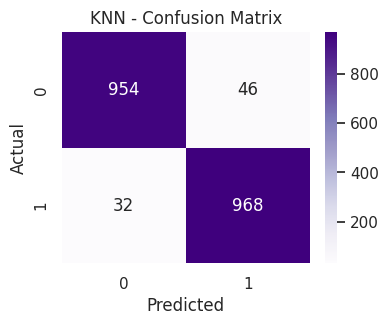

In [15]:
print("K-NN RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Purples")
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Model 5 : XGBoost

# Training the Model

In [16]:
!pip install xgboost


In [17]:
from xgboost import XGBClassifier


In [18]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


# Evaluating the Model

XGBOOST RESULTS
Accuracy: 0.986

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



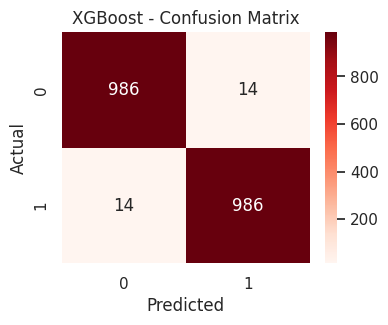

In [19]:
print("XGBOOST RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Reds")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Applying the Cross Validation to check the overfitting and it came to be models are not overfitted .

# Common Libraires for Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv = 5   # 5-Fold Cross Validation


# Cross Validation for Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lr_cv = LogisticRegression(max_iter=1000)

# Cross-validation scores
lr_scores = cross_val_score(lr_cv, X_scaled, y, cv=5, scoring='accuracy')

print("LOGISTIC REGRESSION CROSS-VALIDATION")
print("CV Accuracy Scores:", lr_scores)
print("Mean CV Accuracy:", lr_scores.mean())
print("Standard Deviation:", lr_scores.std())


LOGISTIC REGRESSION CROSS-VALIDATION
CV Accuracy Scores: [0.9245 0.9465 0.9535 0.9075 0.9325]
Mean CV Accuracy: 0.9329000000000001
Standard Deviation: 0.01628004913997499


# Cross Validation for Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_cv = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    random_state=42
)

dt_scores = cross_val_score(dt_cv, X_scaled, y, cv=5, scoring='accuracy')

print("\nDECISION TREE CROSS-VALIDATION")
print("CV Accuracy Scores:", dt_scores)
print("Mean CV Accuracy:", dt_scores.mean())
print("Standard Deviation:", dt_scores.std())



DECISION TREE CROSS-VALIDATION
CV Accuracy Scores: [0.95   0.9705 0.965  0.952  0.9605]
Mean CV Accuracy: 0.9596
Standard Deviation: 0.007729165543575863


# Cross Validation for  Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_cv = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42
)

rf_scores = cross_val_score(rf_cv, X_scaled, y, cv=5, scoring='accuracy')

print("\nRANDOM FOREST CROSS-VALIDATION")
print("CV Accuracy Scores:", rf_scores)
print("Mean CV Accuracy:", rf_scores.mean())
print("Standard Deviation:", rf_scores.std())



RANDOM FOREST CROSS-VALIDATION
CV Accuracy Scores: [0.974  0.9815 0.9845 0.9635 0.968 ]
Mean CV Accuracy: 0.9743
Standard Deviation: 0.00790316392339171


#  Cross Validation for K-Nearest Neighbours

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_cv = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski'
)

knn_scores = cross_val_score(knn_cv, X_scaled, y, cv=5, scoring='accuracy')

print("\nK-NN CROSS-VALIDATION")
print("CV Accuracy Scores:", knn_scores)
print("Mean CV Accuracy:", knn_scores.mean())
print("Standard Deviation:", knn_scores.std())



K-NN CROSS-VALIDATION
CV Accuracy Scores: [0.9375 0.965  0.95   0.9025 0.916 ]
Mean CV Accuracy: 0.9342
Standard Deviation: 0.022562358032794345


# Cross Validation for XGBoost

In [25]:
from xgboost import XGBClassifier

xgb_cv = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)

xgb_scores = cross_val_score(xgb_cv, X_scaled, y, cv=5, scoring='accuracy')

print("\nXGBOOST CROSS-VALIDATION")
print("CV Accuracy Scores:", xgb_scores)
print("Mean CV Accuracy:", xgb_scores.mean())
print("Standard Deviation:", xgb_scores.std())



XGBOOST CROSS-VALIDATION
CV Accuracy Scores: [0.9775 0.985  0.987  0.9685 0.9775]
Mean CV Accuracy: 0.9791000000000001
Standard Deviation: 0.0065528619701623325


# Comparative Analysis Using Table for normal accuracies and Cross Validation metrics

In [26]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Creating final comparison table
results_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "K-Nearest Neighbours",
        "XGBoost"
    ],

    "Test Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_xgb)
    ],

    "CV Mean Accuracy": [
        lr_scores.mean(),
        dt_scores.mean(),
        rf_scores.mean(),
        knn_scores.mean(),
        xgb_scores.mean()
    ],

    "CV Standard Deviation": [
        lr_scores.std(),
        dt_scores.std(),
        rf_scores.std(),
        knn_scores.std(),
        xgb_scores.std()
    ]
})

# Sorting by CV Mean Accuracy (Best model on top)
results_df = results_df.sort_values(by="CV Mean Accuracy", ascending=False)

results_df


,Model,Test Accuracy,CV Mean Accuracy,CV Standard Deviation
4,XGBoost,0.9860,0.9791,0.006553
2,Random Forest,0.9850,0.9743,0.007903
1,Decision Tree,0.9655,0.9596,0.007729
3,K-Nearest Neighbours,0.9610,0.9342,0.022562
0,Logistic Regression,0.9520,0.9329,0.016280


# Comparative Analysis Using Bar Graph

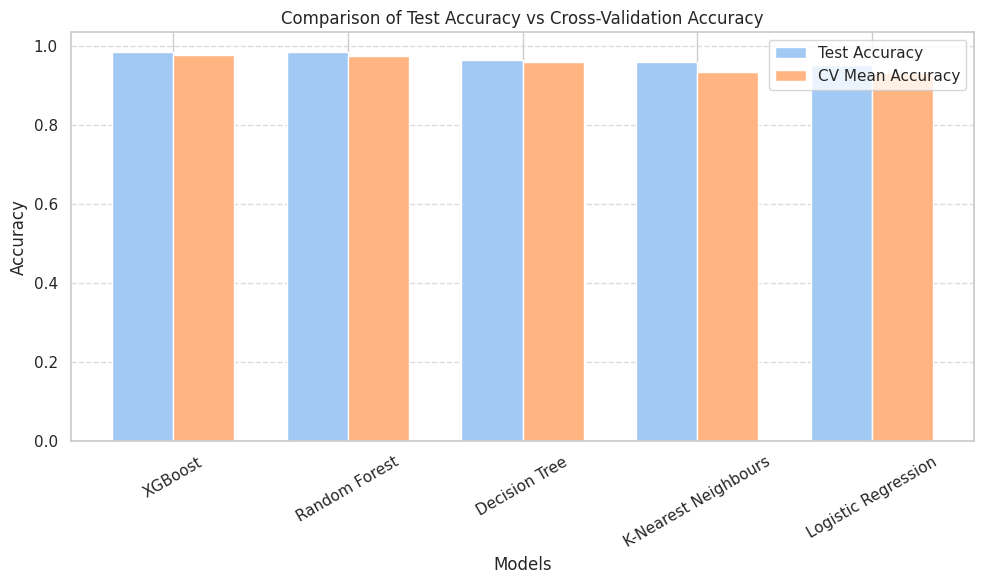

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting values from results_df
models = results_df["Model"]
test_acc = results_df["Test Accuracy"]
cv_acc = results_df["CV Mean Accuracy"]

# Bar positions
x = np.arange(len(models))
width = 0.35

# Plot
plt.figure(figsize=(10,6))
plt.bar(x - width/2, test_acc, width, label='Test Accuracy')
plt.bar(x + width/2, cv_acc, width, label='CV Mean Accuracy')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Test Accuracy vs Cross-Validation Accuracy")
plt.xticks(ticks=x, labels=models, rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Roc curves for each model and All curves at once

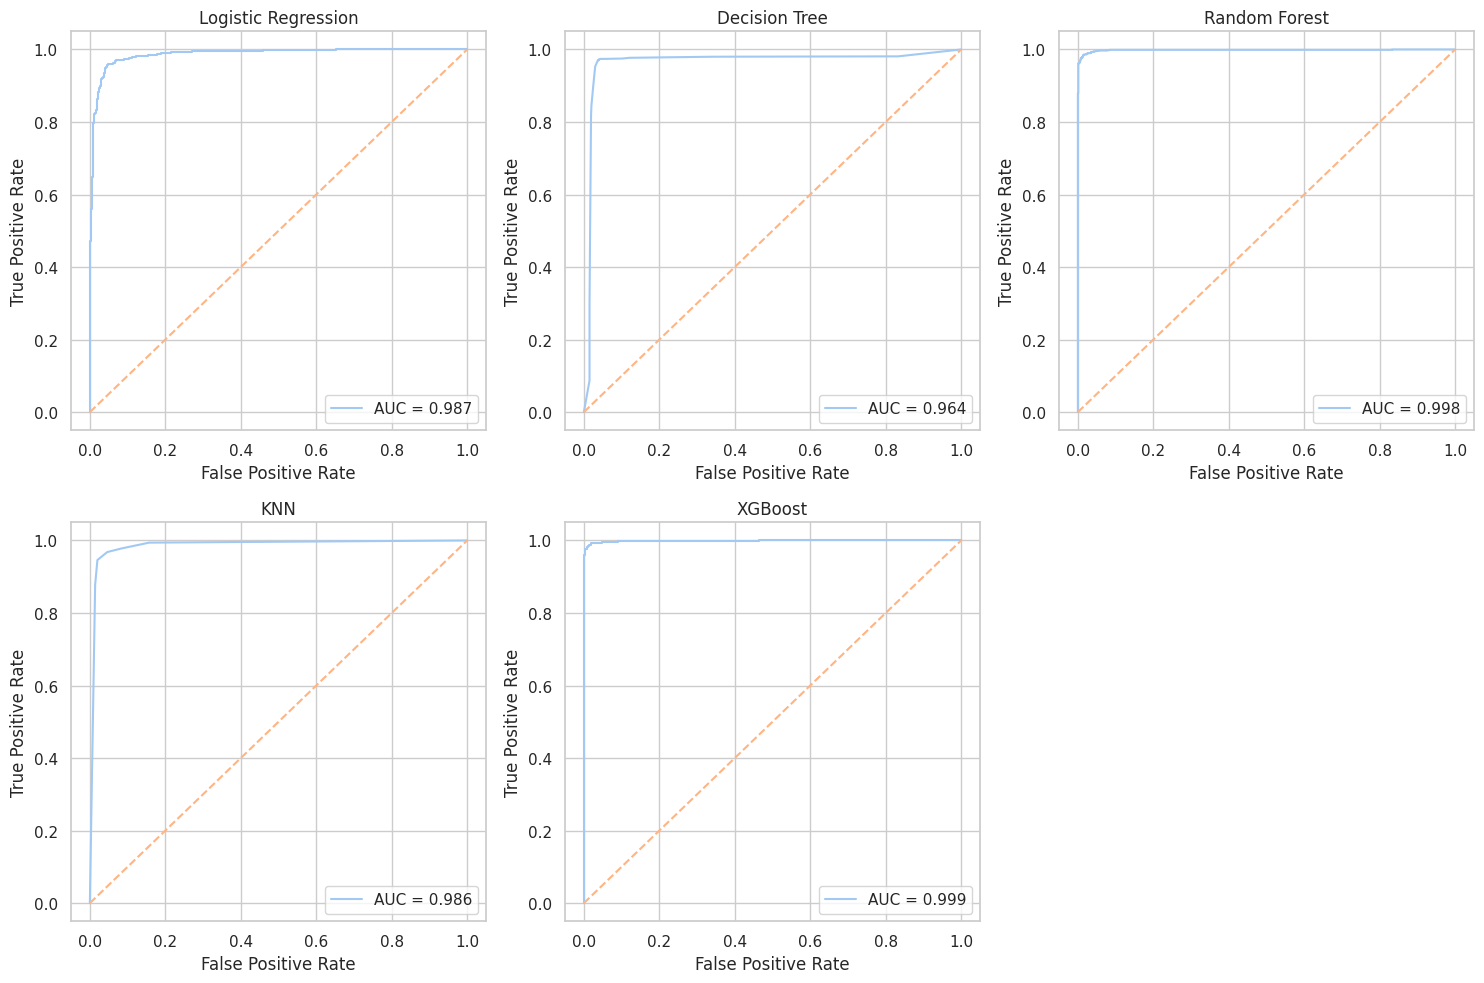

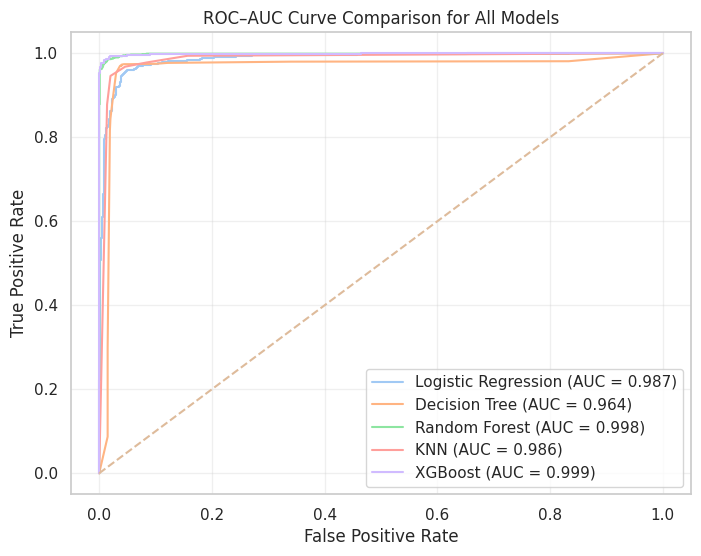

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Getting probability scores
lr_probs  = lr_model.predict_proba(X_test)[:, 1]
dt_probs  = dt_model.predict_proba(X_test)[:, 1]
rf_probs  = rf_model.predict_proba(X_test)[:, 1]
knn_probs = knn_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Computing ROC curves
models_probs = {
    "Logistic Regression": lr_probs,
    "Decision Tree": dt_probs,
    "Random Forest": rf_probs,
    "KNN": knn_probs,
    "XGBoost": xgb_probs
}

roc_data = {}

for model, probs in models_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    roc_data[model] = (fpr, tpr, roc_auc)


# SIDE-BY-SIDE ROC CURVES

plt.figure(figsize=(15,10))

for idx, (model, (fpr, tpr, roc_auc)) in enumerate(roc_data.items(), start=1):
    plt.subplot(2, 3, idx)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.title(model)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()

plt.tight_layout()
plt.show()


# ALL ROC CURVES TOGETHER

plt.figure(figsize=(8,6))

for model, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{model} (AUC = {roc_auc:.3f})")

plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve Comparison for All Models")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
